In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns

import os

os.environ["DB_PATH"]='../../../db.json'
from neuroblu_postgres.databaseIO import pgIO

import spacy
nlp=spacy.load("en_core_sci_scibert")
def tokeniseUsingSciSpacy(sentence):
    doc = nlp(sentence)
    cleaned_data=list(item.text for item in doc.sents)
    return cleaned_data
from nltk.tokenize import sent_tokenize

from tqdm import tqdm
tqdm().pandas()

0it [00:00, ?it/s]


In [2]:
responSectionTextsDf_nltkSciSpacy_break = pd.read_csv('responSectionTextsDf_nltkSciSpacy_break.csv')
responSectionTextsDf_nltkSciSpacy_break.patient_encounter_id=responSectionTextsDf_nltkSciSpacy_break.patient_encounter_id.apply(str)
responSectionTextsDf_nltkSciSpacy_break.header=responSectionTextsDf_nltkSciSpacy_break.header.apply(str)
responSectionTextsDf_nltkSciSpacy_break.nltk_break_order=responSectionTextsDf_nltkSciSpacy_break.nltk_break_order.apply(int)

display(responSectionTextsDf_nltkSciSpacy_break.head())
display(responSectionTextsDf_nltkSciSpacy_break.shape)

,patient_encounter_id,header,section,nltk_break,nltk_break_order,sciSpacy_break,SciSpacedSentenceIdex
0,1439220,22507,"pt accompanied by his mother , his new persona...","pt accompanied by his mother , his new persona...",1,"pt accompanied by his mother , his new persona...",1
1,1439220,22507,"pt accompanied by his mother , his new persona...","pt accompanied by his mother , his new persona...",1,& cw pt was recently hosp at [LOCATION_3] [DAT...,2
2,1439220,22507,"pt accompanied by his mother , his new persona...","pt accompanied by his mother , his new persona...",1,& stated he made this false statement in order...,3
3,1439220,22507,"pt accompanied by his mother , his new persona...","pt accompanied by his mother , his new persona...",1,& once again discussed that it is crucial for ...,4
4,1474333,22507,pt reported he has not been doing well b/c he ...,pt reported he has not been doing well b/c he ...,1,pt reported he has not been doing well b/c he ...,1


(9167, 7)

In [3]:
responSectionTextsDf_nltk_break = Path('responSectionTextsDf_nltk_break.csv')
responSectionTextsDf_nltk_break = pd.read_csv(responSectionTextsDf_nltk_break,
                                             
                                              )
responSectionTextsDf_nltk_break.dropna(
    axis=0, subset='nltk_break_order', inplace=True
)

responSectionTextsDf_nltk_break.patient_encounter_id=responSectionTextsDf_nltk_break.patient_encounter_id.apply(str)
responSectionTextsDf_nltk_break.header=responSectionTextsDf_nltk_break.header.apply(str)
responSectionTextsDf_nltk_break.section=responSectionTextsDf_nltk_break.section.apply(str)
responSectionTextsDf_nltk_break.nltk_break=responSectionTextsDf_nltk_break.nltk_break.apply(str)
responSectionTextsDf_nltk_break.nltk_break_order=responSectionTextsDf_nltk_break.nltk_break_order.apply(int)

display(responSectionTextsDf_nltk_break.head())
display(responSectionTextsDf_nltk_break.shape)

/tmp/ipykernel_982757/105432829.py:2: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  responSectionTextsDf_nltk_break = pd.read_csv(responSectionTextsDf_nltk_break,


,patient_encounter_id,header,section,nltk_break,nltk_break_order
0,1111796,2188,none,none,1
1,942804,3350,Auditory hallucinations have stopped. Denies b...,Auditory hallucinations have stopped.,1
2,942804,3350,Auditory hallucinations have stopped. Denies b...,Denies being paranoid.,2
3,942804,3350,Auditory hallucinations have stopped. Denies b...,Hygiene and grooming have improved,3
4,942804,24876,continue Welbutrin XL 300 mg in the morining H...,continue Welbutrin XL 300 mg in the morining H...,1


(3457392, 5)

In [4]:
noteSentences = pd.merge(
    responSectionTextsDf_nltk_break[
        ['patient_encounter_id', 'header',
         'nltk_break', 'nltk_break_order'
         ]
        ], 
    responSectionTextsDf_nltkSciSpacy_break[
        [
            'patient_encounter_id', 'header', 'nltk_break_order',
            'sciSpacy_break', 'SciSpacedSentenceIdex'
        ]
        ],
    how='left',
    left_on=['patient_encounter_id', 'header', 'nltk_break_order'],
    right_on=['patient_encounter_id', 'header', 'nltk_break_order'],
)

In [ ]:
noteSentences['finalSentenceBreak'] = noteSentences.sciSpacy_break.fillna(
    noteSentences.nltk_break
    )

noteSentences['finalSentenceBreak_wsCnt'] = noteSentences['finalSentenceBreak']\
    .str.count(' ')


In [13]:
noteSentences['finalSentenceBreak_order'] = noteSentences.groupby(
    ['patient_encounter_id',]
).sciSpacy_break.transform(lambda v: range(1, len(v)+1 ))

noteSentences['database'] = 'thc'

In [51]:
noteSentences.patient_encounter_id = noteSentences.patient_encounter_id.apply(
    lambda v: 'thc_'+str(v)
)

noteSentences['sentenceId'] = noteSentences.patient_encounter_id + '_' + noteSentences.finalSentenceBreak_order.apply(str)

In [52]:
noteSentences['finalSentenceBreak'] = noteSentences.sciSpacy_break.fillna(
    noteSentences.nltk_break
    ).str.replace('\s{2,}', " ")

noteSentences['finalSentenceBreak_wsCnt'] = noteSentences['finalSentenceBreak']\
    .str.count(' ')

The default value of regex will change from True to False in a future version.


In [53]:
(~noteSentences.sciSpacy_break.isna()).sum()

9167

<AxesSubplot:xlabel='sciSpacy_break'>

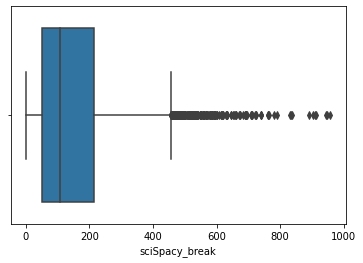

In [54]:
sns.boxplot(x=noteSentences.sciSpacy_break.str.count(' '))

<AxesSubplot:xlabel='finalSentenceBreak_wsCnt'>

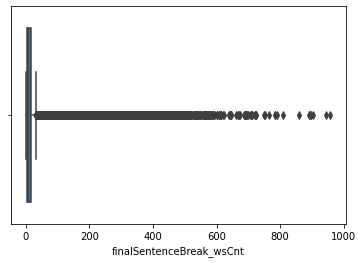

In [55]:
sns.boxplot(x=noteSentences['finalSentenceBreak_wsCnt'])

In [56]:
(noteSentences['finalSentenceBreak_wsCnt']>250).sum()

1764

In [57]:
noteSentences.loc[noteSentences['finalSentenceBreak_wsCnt']>250, 'finalSentenceBreak'].iloc[9]

'pt here with rc [NAME_3] reported that since pt was denied soc sec benefits she has had multiple complaints & requested residential treatment for substanceuse b/c her attorney felt this would be beneficial in the appeal process per pt she uses once/mth last used about 4-5 wks ago ; she c/o feeling depressed & her primary problem is inadequate sleep & she has been anxious due to stressors such as lack of income & permanent housing I discussed the fact that pt has been doing well until substance use resumed & this can cause pt to experience any of the above sxs I reminded pt that several times I recommended OP treatment but she refused once again I educated pt on the importance of sobriety in her treatment & if her use is about 1/mth then particiaption in NA community groups at least 2-3 d/wk to maintain abstinence is my current recommendation & signature verification is required pt initially stated she could not get to OP groups then later stated she has a friend that would be able to 

In [58]:
noteSentences

,patient_encounter_id,header,nltk_break,nltk_break_order,sciSpacy_break,SciSpacedSentenceIdex,finalSentenceBreak,finalSentenceBreak_wsCnt,finalSentenceBreak_order,database,sentenceId
0,thc_1111796,2188,none,1,NaN,NaN,none,0,1,thc,thc_1111796_1
1,thc_942804,3350,Auditory hallucinations have stopped.,1,NaN,NaN,Auditory hallucinations have stopped.,3,1,thc,thc_942804_1
2,thc_942804,3350,Denies being paranoid.,2,NaN,NaN,Denies being paranoid.,2,2,thc,thc_942804_2
3,thc_942804,3350,Hygiene and grooming have improved,3,NaN,NaN,Hygiene and grooming have improved,4,3,thc,thc_942804_3
4,thc_942804,24876,continue Welbutrin XL 300 mg in the morining H...,1,NaN,NaN,continue Welbutrin XL 300 mg in the morining H...,16,4,thc,thc_942804_4
...,...,...,...,...,...,...,...,...,...,...,...
3463383,thc_10871829,24082,Able to complete ADLs,1,NaN,NaN,Able to complete ADLs,3,14,thc,thc_10871829_14
3463384,thc_10871829,22269,Variable concentration,1,NaN,NaN,Variable concentration,1,15,thc,thc_10871829_15
3463385,thc_10874024,10147,No new complaints.,1,NaN,NaN,No new complaints.,2,28,thc,thc_10874024_28
3463386,thc_10874031,22269,no impairment evident currnetly.,1,NaN,NaN,no impairment evident currnetly.,3,15,thc,thc_10874031_15


In [60]:
noteSentencesPreConfirm = noteSentences[[
    'patient_encounter_id', 'sentenceId', 'database', 'header',
    'finalSentenceBreak', 'finalSentenceBreak_wsCnt', 'finalSentenceBreak_order',
]].copy()
noteSentencesPreConfirm

,patient_encounter_id,sentenceId,database,header,finalSentenceBreak,finalSentenceBreak_wsCnt,finalSentenceBreak_order
0,thc_1111796,thc_1111796_1,thc,2188,none,0,1
1,thc_942804,thc_942804_1,thc,3350,Auditory hallucinations have stopped.,3,1
2,thc_942804,thc_942804_2,thc,3350,Denies being paranoid.,2,2
3,thc_942804,thc_942804_3,thc,3350,Hygiene and grooming have improved,4,3
4,thc_942804,thc_942804_4,thc,24876,continue Welbutrin XL 300 mg in the morining H...,16,4
...,...,...,...,...,...,...,...
3463383,thc_10871829,thc_10871829_14,thc,24082,Able to complete ADLs,3,14
3463384,thc_10871829,thc_10871829_15,thc,22269,Variable concentration,1,15
3463385,thc_10874024,thc_10874024_28,thc,10147,No new complaints.,2,28
3463386,thc_10874031,thc_10874031_15,thc,22269,no impairment evident currnetly.,3,15


# Final touchup

,patient_encounter_id,sentenceId,database,header,finalSentenceBreak,finalSentenceBreak_wsCnt,finalSentenceBreak_order
0,1111796,1111796_1,thc,2188,none,0,1
1,942804,942804_1,thc,3350,Auditory hallucinations have stopped.,3,1
2,942804,942804_2,thc,3350,Denies being paranoid.,2,2
3,942804,942804_3,thc,3350,Hygiene and grooming have improved,4,3
4,942804,942804_4,thc,24876,continue Welbutrin XL 300 mg in the morining H...,16,4
...,...,...,...,...,...,...,...
3463383,10871829,10871829_14,thc,24082,Able to complete ADLs,3,14
3463384,10871829,10871829_15,thc,22269,Variable concentration,1,15
3463385,10874024,10874024_28,thc,10147,No new complaints.,2,28
3463386,10874031,10874031_15,thc,22269,no impairment evident currnetly.,3,15


In [42]:
noteSentencesPreConfirm_required = noteSentencesPreConfirm[noteSentencesPreConfirm.finalSentenceBreak_wsCnt>250].copy()
noteSentencesPreConfirm_required.finalSentenceBreak=noteSentencesPreConfirm_required.finalSentenceBreak.str\
    .replace('-{3,}', ' \r\n ')
    
noteSentencesPreConfirm_required.finalSentenceBreak=noteSentencesPreConfirm_required.finalSentenceBreak.str\
    .replace(';', ' \r\n ')

The default value of regex will change from True to False in a future version.


In [41]:
noteSentencesPreConfirm_required['finalSentenceBreak_sciSapced'] = noteSentencesPreConfirm_required\
    .finalSentenceBreak\
    .progress_apply(tokeniseUsingSciSpacy)

 16%|█▌        | 275/1764 [05:31<29:56,  1.21s/it]


KeyboardInterrupt: 

# Upload data

In [66]:
noteSentencesPreConfirm.to_csv('noteSentencesPreConfirm.csv', index=False)

In [2]:
noteSentencesPreConfirm = pd.read_csv('noteSentencesPreConfirm.csv',
                                      dtype=dict(
                                          header=str,
                                          finalSentenceBreak_wsCnt=int,
                                          finalSentenceBreak_order=int,
                                      )
                                      )

In [3]:
noteSentencesPreConfirm

,patient_encounter_id,sentenceId,database,header,finalSentenceBreak,finalSentenceBreak_wsCnt,finalSentenceBreak_order
0,thc_1111796,thc_1111796_1,thc,2188,none,0,1
1,thc_942804,thc_942804_1,thc,3350,Auditory hallucinations have stopped.,3,1
2,thc_942804,thc_942804_2,thc,3350,Denies being paranoid.,2,2
3,thc_942804,thc_942804_3,thc,3350,Hygiene and grooming have improved,4,3
4,thc_942804,thc_942804_4,thc,24876,continue Welbutrin XL 300 mg in the morining H...,16,4
...,...,...,...,...,...,...,...
3463383,thc_10871829,thc_10871829_14,thc,24082,Able to complete ADLs,3,14
3463384,thc_10871829,thc_10871829_15,thc,22269,Variable concentration,1,15
3463385,thc_10874024,thc_10874024_28,thc,10147,No new complaints.,2,28
3463386,thc_10874031,thc_10874031_15,thc,22269,no impairment evident currnetly.,3,15


In [4]:
# [
#     'patient_encounter_id', 'sentenceId', 'database', 'header',
#     'finalSentenceBreak', 'finalSentenceBreak_wsCnt', 'finalSentenceBreak_order',
# ]

noteSentencesPreConfirm_valuesList = noteSentencesPreConfirm.values.tolist()
noteSentencesPreConfirm_valuesList

[['thc_1111796', 'thc_1111796_1', 'thc', '2188', 'none', 0, 1],
 ['thc_942804',
  'thc_942804_1',
  'thc',
  '3350',
  'Auditory hallucinations have stopped.',
  3,
  1],
 ['thc_942804', 'thc_942804_2', 'thc', '3350', 'Denies being paranoid.', 2, 2],
 ['thc_942804',
  'thc_942804_3',
  'thc',
  '3350',
  'Hygiene and grooming have improved',
  4,
  3],
 ['thc_942804',
  'thc_942804_4',
  'thc',
  '24876',
  'continue Welbutrin XL 300 mg in the morining Haldol 10 mg at night cogentin 1mg at night',
  16,
  4],
 ['thc_942804',
  'thc_942804_5',
  'thc',
  '22507',
  'Expressed concern about inability to work because he does not have identification.',
  11,
  5],
 ['thc_942804',
  'thc_942804_6',
  'thc',
  '22507',
  'He reports losing it 2 yrs.',
  5,
  6],
 ['thc_942804', 'thc_942804_7', 'thc', '22507', 'ago.', 0, 7],
 ['thc_942804',
  'thc_942804_8',
  'thc',
  '22507',
  'He reoport going to a chuch to get help in obtaining his ID Hallucinations: No longer report AH.. Report no comma

In [5]:
success = pgIO.commitDataList(
    query='''
    INSERT INTO v1_nlp.sentences
    (patient_encounter_id, 
    sentence_id,
    database,
    header,
    sentence,
    n_token,
    sentence_pos)
    VALUES %s;
    ''',
    values=noteSentencesPreConfirm_valuesList,
    dbName='NLP_CDM',
)
success

True